In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:\Codes\Practice\ML\Profitable Customers in Mall\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
df.fillna(method='ffill', inplace=True)

C:\Users\prathmesh\AppData\Local\Temp\ipykernel_16360\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [7]:
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['KMeans_Cluster'] = kmeans.labels_

In [10]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
df['Agg_Cluster'] = agg_clustering.fit_predict(X)

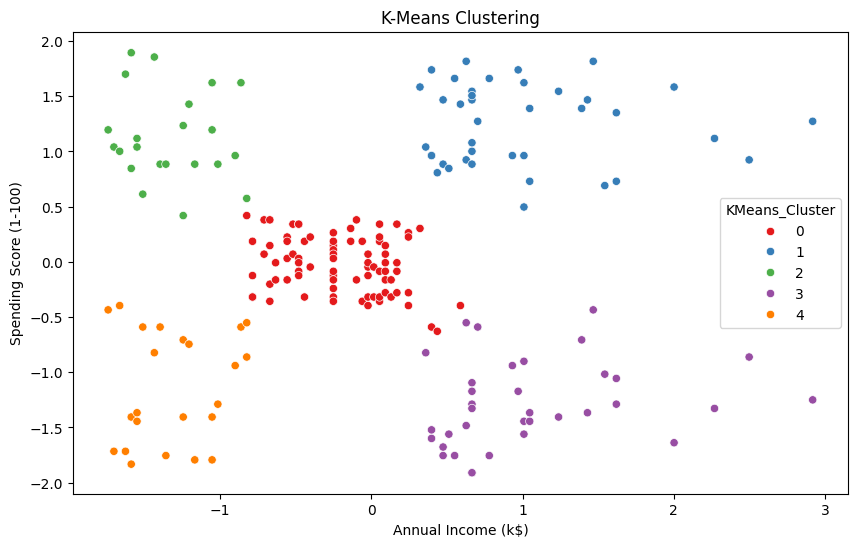

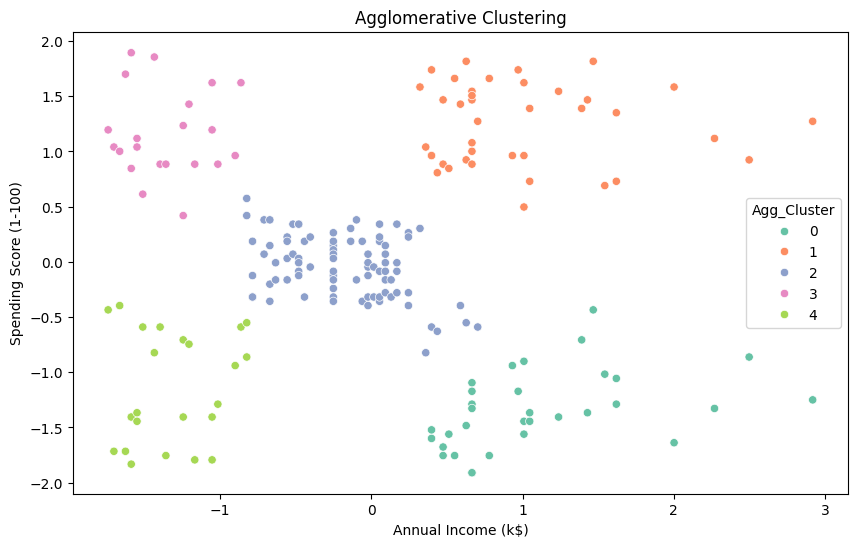

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Agg_Cluster'], palette='Set2')
plt.title('Agglomerative Clustering')
plt.show()

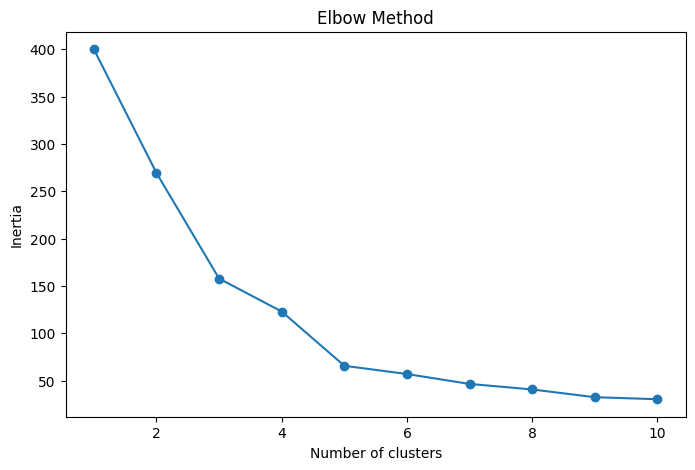

In [12]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

agg_silhouette = silhouette_score(X, agg_clustering.labels_)
print(f"Agglomerative Silhouette Score: {agg_silhouette}")

KMeans Silhouette Score: 0.4427611772821541
Agglomerative Silhouette Score: 0.5538089226688662
